# **Notebook's Author**
- **Project:** Sales Prediction
- **Author Name:** Hamza Ali




# `Goal of the Analysis`
1. `Exploratory Data Analysis (EDA):`
    Gain insights into the data, understanding relationships and distributions that might influence model selection and performance.

2. `Data Preparation:`

    `Cleaning and Preprocessing:`
    Ensure the dataset is free of inconsistencies and missing values to improve model accuracy.

    `Feature Engineering:`
    Transform or create features to enhance model performance.

    `Data Splitting:`
    Divide the dataset into training and testing sets for model validation.

3. `Model Training:`
    Selection of Models: Choose a diverse set of models to compare. This might include linear regression, Random Forest Regression and Gradient Boosting Machines (GBM).


4. `Model Evaluation and Comparison:`

    `Evaluation Metrics:`
    Utilize metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) to assess each model's performance.

5. `Predictive Performance:`
    Determine which model performs best on the test data based on the chosen evaluation metrics.

6.  `Insights and Conclusion:`
    Draw conclusions from the model comparisons and provide insights into which models are most effective for predicting heart disease in this specific dataset.


# Models to be trained

I will be training the following models on the dataset:

1. Linear Regression
2. Random Forest Regression
3. Gradient Boosting Machines (GBM)


# Evaluation Metrics:

The performance of these models will be assessed using the following metrics:

1. Root Mean Squared Error (RMSE)
2. Mean Absolute Error (MAE)


# `About the Dataset`

The Kaggle Sales Prediction dataset consists of multiple attributes aimed at forecasting the sales of a retail store. Each record in this dataset corresponds to a specific day of operation, with the columns detailing various factors such as customer footfall, promotional activities, holidays, and competition. The target variable is the sales amount for that day, providing a comprehensive view of the elements influencing retail sales performance.

### `Attribute Information:`

1. **Sales**: The sales amount (target variable).

2. **Customers**: Number of customers on a given day.

3. **Open**: Indicator (1/0) whether the store was open.

4. **Promo**: Indicator (1/0) whether a promo was active.

5. **StateHoliday**: Indicates a state holiday (0 = no holiday, a = public holiday, b = Easter holiday, c = Christmas).

6. **SchoolHoliday**: Indicator (1/0) whether the day was a school holiday.

7. **StoreType**: Type of store (a, b, c, d).

8. **Assortment**: Level of assortment (a = basic, b = extra, c = extended).

9. **CompetitionDistance**: Distance in meters to the nearest competitor store.

10. **CompetitionOpenSinceMonth**: Month when the nearest competitor was opened.

11. **CompetitionOpenSinceYear**: Year when the nearest competitor was opened.

12. **Promo2**: Indicator (1/0) whether the store is participating in a continuous promotion.

13. **Promo2SinceWeek**: The week when the store started participating in the continuous promotion.

14. **Promo2SinceYear**: The year when the store started participating in the continuous promotion.

15. **PromoInterval**: Describes the intervals when the continuous promotion is active.

16. **Month**: Month of the entry.

17. **Year**: Year of the entry.

# `Importing Libraries`


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# `Read the Data `

In [50]:
dataset = pd.read_csv('dataset.csv')

## `Data Overview`

- Inspecting the dimensions of the dataset

In [51]:
dataset.head()

,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year
0,5571,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
1,6714,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
2,5371,519,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
3,4257,449,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
4,4209,447,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,6,15


In [52]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} features (columns) in the dataset.")

There are 168607 rows and 17 features (columns) in the dataset.


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168607 entries, 0 to 168606
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      168607 non-null  int64  
 1   Customers                  168607 non-null  int64  
 2   Open                       168607 non-null  int64  
 3   Promo                      168607 non-null  int64  
 4   StateHoliday               168607 non-null  object 
 5   SchoolHoliday              168607 non-null  int64  
 6   StoreType                  168607 non-null  object 
 7   Assortment                 168607 non-null  object 
 8   CompetitionDistance        168179 non-null  float64
 9   CompetitionOpenSinceMonth  114961 non-null  float64
 10  CompetitionOpenSinceYear   114961 non-null  float64
 11  Promo2                     168607 non-null  int64  
 12  Promo2SinceWeek            83808 non-null   float64
 13  Promo2SinceYear            83

#### Statistical Summary of the Dataset

In [54]:
dataset.describe()

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,month,year
count,168607.000000,168607.000000,168607.0,168607.000000,168607.000000,168179.000000,114961.000000,114961.000000,168607.000000,83808.000000,83808.000000,168607.000000,168607.000000
mean,7720.344547,763.247244,1.0,0.447081,0.193634,5452.959823,7.233845,2008.710563,0.497061,23.264533,2011.753377,5.855522,13.830737
std,3432.319164,401.002459,0.0,0.497193,0.395146,7822.034528,3.208495,5.965996,0.499993,14.092297,1.663020,3.327141,0.777344
min,326.000000,40.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,13.000000
25%,5417.000000,520.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,3.000000,13.000000
50%,7078.000000,678.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,6.000000,14.000000
75%,9235.000000,893.000000,1.0,1.000000,0.000000,6880.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,8.000000,14.000000
max,43559.000000,5192.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,12.000000,15.000000


---

    Observations:

- The dataset consists of 168607 entries.
- There are 17 columns in total.
- These columns are a mix of numerical (int64 and float64) and categorical (object) data types.
- There are missing values in the dataset, as indicated by the non-null values in each column which we will deal later after exploring different columns just to get a better understanding of the dataset.

---

# 1. `Exploring Different Columns:`

# - Target Column (Sales)

First, let's explore our target variable, Sales, which represents the total sales amount (in monetary units) generated by the retail store on a particular day.

In [55]:
max_sales= dataset['Sales'].max()
min_sales= dataset['Sales'].min()
print("Observation: ")
print("---")
print(f'Minimum sales made per day: {min_sales}')
print(f"Maximum sales made per day: {max_sales}")
print(f"So, the sales made per day is between {min_sales} and {max_sales}.")

Observation: 
---
Minimum sales made per day: 326
Maximum sales made per day: 43559
So, the sales made per day is between 326 and 43559.


Text(0, 0.5, 'Frequency')

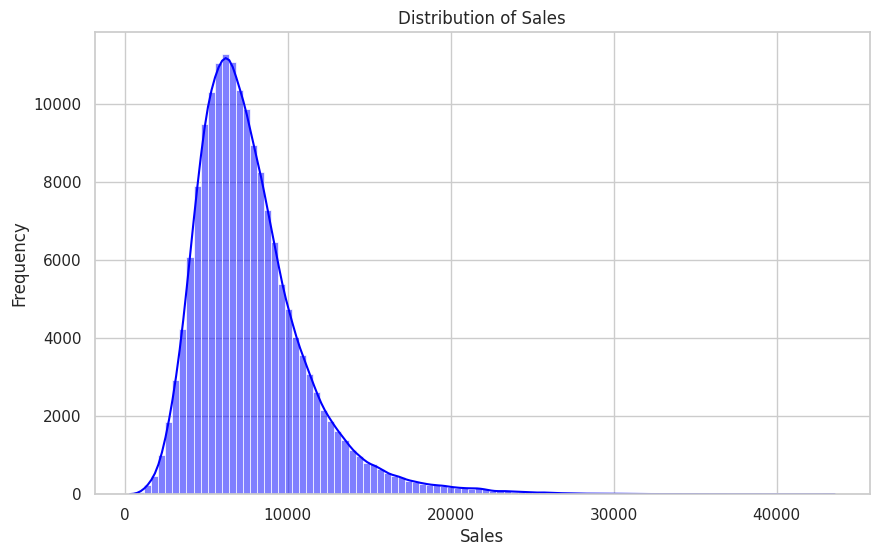

In [56]:
# Plot
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Sales'], bins=100, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# - Customers Column

The Customers column in the dataset represents the number of customers that visited the store on a given day.

In [57]:
max_customers = dataset['Customers'].max()
min_customers = dataset['Customers'].min()
print("Observation: ")
print("---")
print(f'Minimum number of customers: {min_customers}')
print(f"Maximum number of customers: {max_customers}")
print(f"So, the number of customers that visited the store on a single day is between {min_customers} and {max_customers}.")

Observation: 
---
Minimum number of customers: 40
Maximum number of customers: 5192
So, the number of customers that visited the store on a single day is between 40 and 5192.


Text(0, 0.5, 'Frequency')

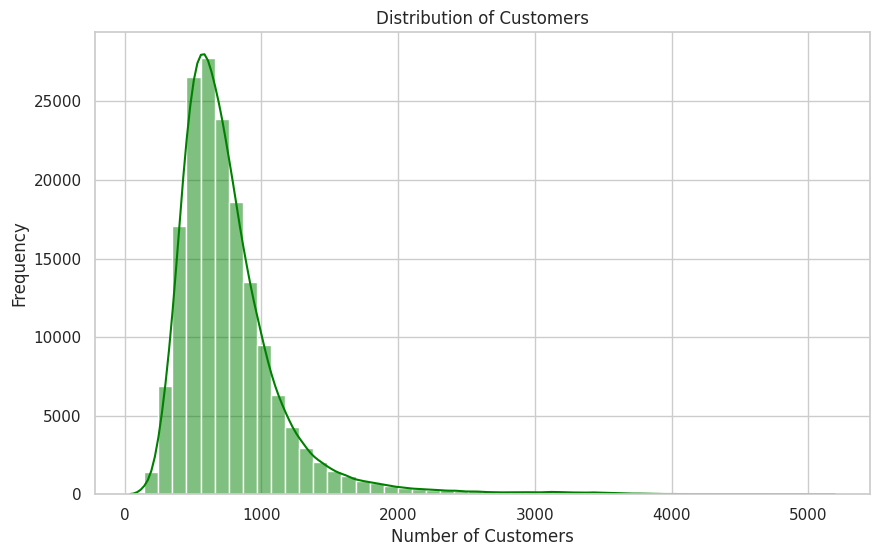

In [58]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Customers'], bins=50, kde=True, color='green')
plt.title('Distribution of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')

# - Open Column:

The Open column in the dataset is a binary indicator that signifies whether the store was open (1) or closed (0) on a particular day.

In [59]:
dataset['Open'].value_counts()

Open
1    168607
Name: count, dtype: int64

Text(0, 0.5, 'Count')

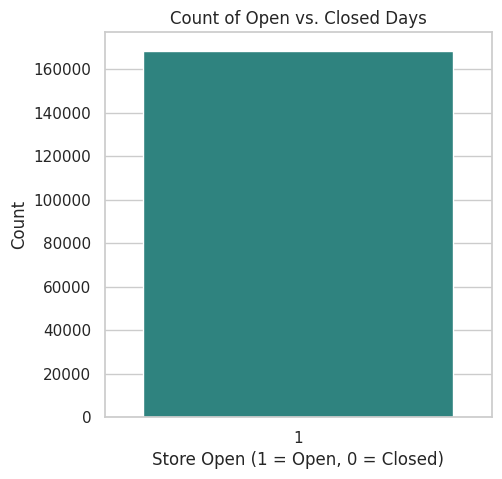

In [60]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of open and closed days
plt.figure(figsize=(5, 5))
sns.countplot(x='Open', data=dataset, palette='viridis')
plt.title('Count of Open vs. Closed Days')
plt.xlabel('Store Open (1 = Open, 0 = Closed)')
plt.ylabel('Count')

---

Important Observation:

There is no entry in the dataset for which the store is closed.

# - Promo Column:

The Promo column in the dataset is a binary indicator that signifies whether a promotion was active (1) or not (0) on a particular day.

In [61]:
dataset['Promo'].value_counts()

Promo
0    93226
1    75381
Name: count, dtype: int64

Text(0, 0.5, 'Count')

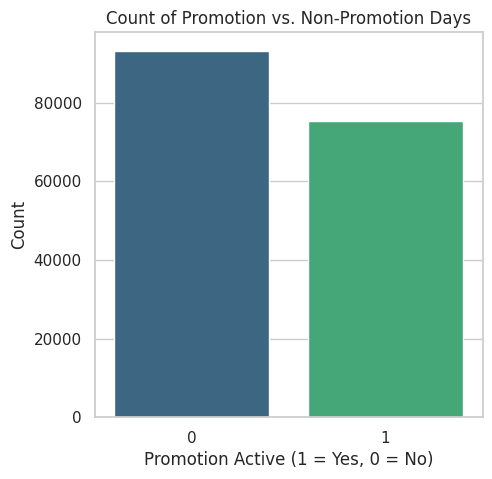

In [62]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of promotion days
plt.figure(figsize=(5, 5))
sns.countplot(x='Promo', data=dataset, palette='viridis')
plt.title('Count of Promotion vs. Non-Promotion Days')
plt.xlabel('Promotion Active (1 = Yes, 0 = No)')
plt.ylabel('Count')

# - StateHoliday Column:

The StateHoliday column in the dataset indicates whether the day is a state holiday and the type of holiday. The values in this column are:

- 0: No holiday
- a: Public holiday
- b: Easter holiday
- c: Christmas

In [63]:
dataset['StateHoliday'].value_counts()

StateHoliday
0    168454
a       116
b        24
c        13
Name: count, dtype: int64

Text(0, 0.5, 'Count')

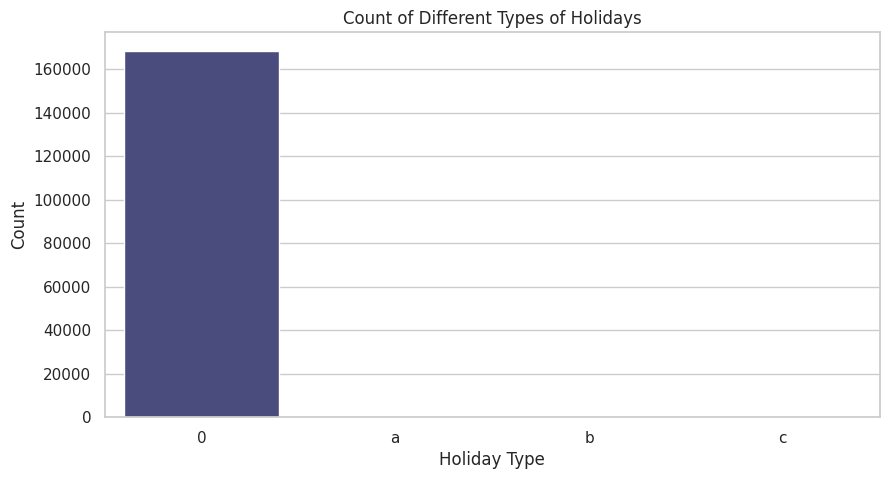

In [64]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of holidays
plt.figure(figsize=(10, 5))
sns.countplot(x='StateHoliday', data=dataset, palette='viridis')
plt.title('Count of Different Types of Holidays')
plt.xlabel('Holiday Type')
plt.ylabel('Count')

# - SchoolHoliday Column:

The SchoolHoliday column in the dataset is a binary indicator that signifies whether the day is a school holiday (1) or not (0).

In [65]:
dataset['SchoolHoliday'].value_counts()

SchoolHoliday
0    135959
1     32648
Name: count, dtype: int64

Text(0, 0.5, 'Count')

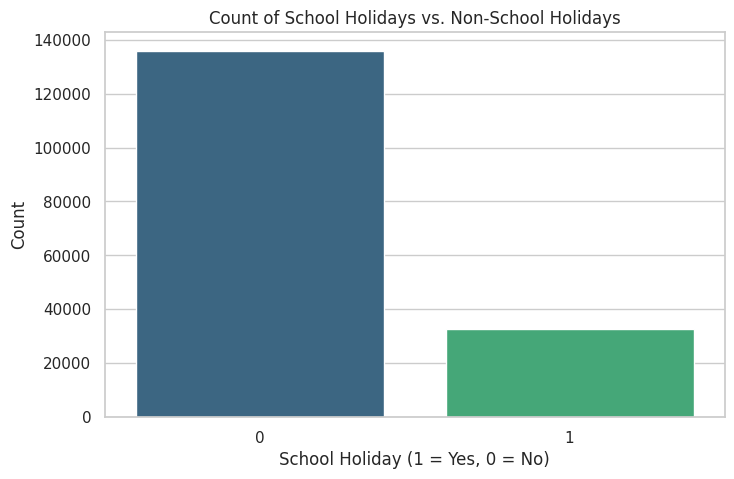

In [66]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of school holidays
plt.figure(figsize=(8, 5))
sns.countplot(x='SchoolHoliday', data=dataset, palette='viridis')
plt.title('Count of School Holidays vs. Non-School Holidays')
plt.xlabel('School Holiday (1 = Yes, 0 = No)')
plt.ylabel('Count')

# - StoreType Column:

The StoreType column in the dataset indicates the type of store, which can influence sales and customer behavior.

In [67]:
dataset['StoreType'].value_counts()

StoreType
a    91078
d    51743
c    22696
b     3090
Name: count, dtype: int64

Text(0, 0.5, 'Count')

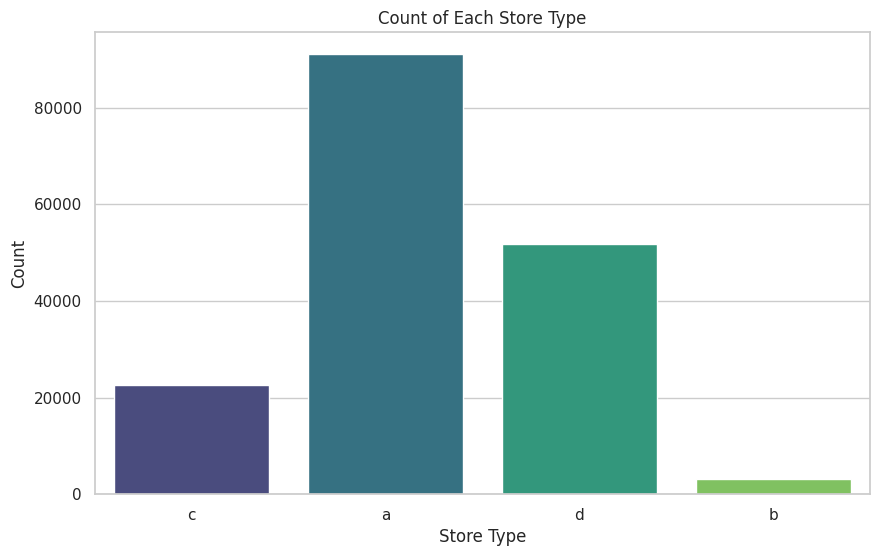

In [68]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of each store type
plt.figure(figsize=(10, 6))
sns.countplot(x='StoreType', data=dataset, palette='viridis')
plt.title('Count of Each Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')

# - Assortment Column:

The Assortment column in the dataset indicates the level of assortment offered by the store. Assortment refers to the variety of products available. The different assortment levels are:

- a: Basic assortment
- b: Extra assortment
- c: Extended assortment

In [69]:
dataset['Assortment'].value_counts()

Assortment
a    88938
c    78097
b     1572
Name: count, dtype: int64

Text(0, 0.5, 'Count')

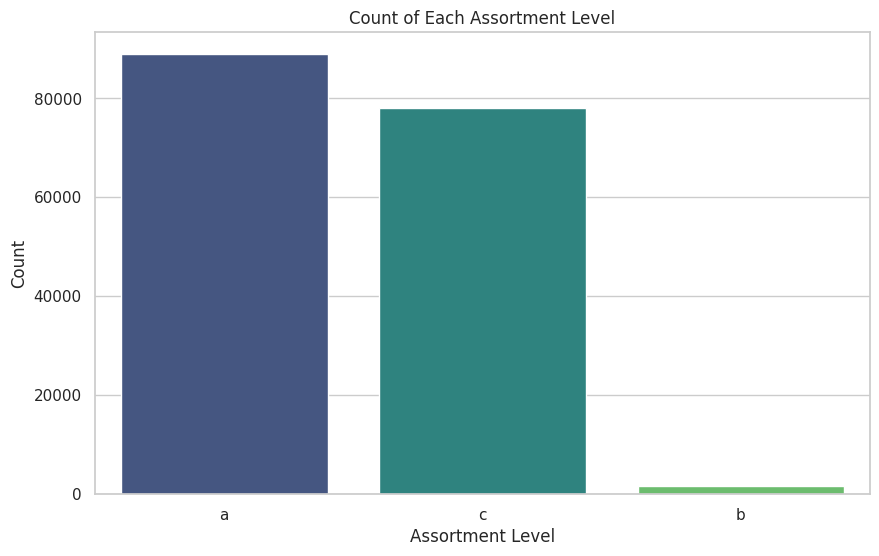

In [70]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of each assortment level
plt.figure(figsize=(10, 6))
sns.countplot(x='Assortment', data=dataset, palette='viridis')
plt.title('Count of Each Assortment Level')
plt.xlabel('Assortment Level')
plt.ylabel('Count')

# - CompetitionDistance Column:

The CompetitionDistance column in the dataset represents the distance (in meters) to the nearest competitor store.

In [71]:
max_distance = dataset['CompetitionDistance'].max()
min_distance = dataset['CompetitionDistance'].min()
print("Observation: ")
print("---")
print(f'Minimum distance to the nearest competitor store: {min_distance}')
print(f"Maximum distance to the nearest competitor store: {max_distance}")
print(f"So, the distance to the nearest competitor store is between {min_distance} and {max_distance}.")

Observation: 
---
Minimum distance to the nearest competitor store: 20.0
Maximum distance to the nearest competitor store: 75860.0
So, the distance to the nearest competitor store is between 20.0 and 75860.0.


Text(0, 0.5, 'Frequency')

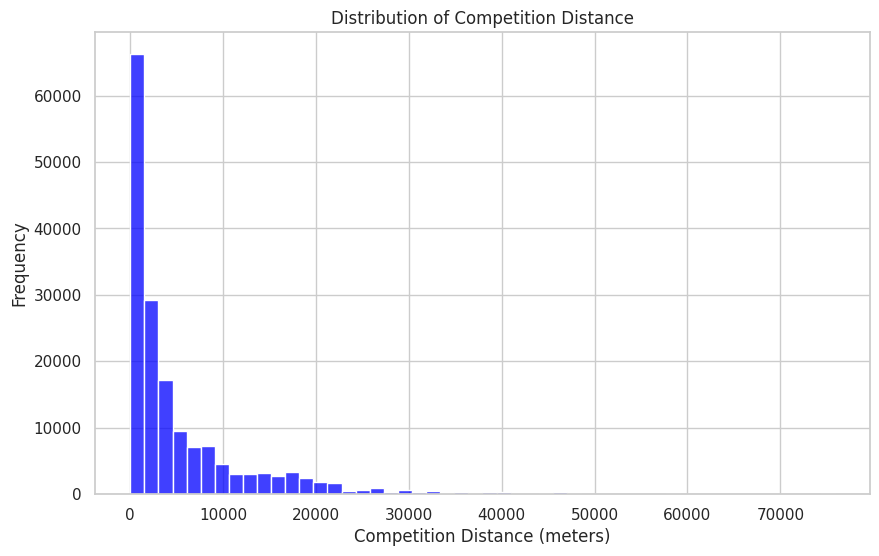

In [72]:
# Plot
sns.set(style="whitegrid")

# Create a histogram to show the distribution of competition distances
plt.figure(figsize=(10, 6))
sns.histplot(dataset['CompetitionDistance'].dropna(), bins=50, color='blue')
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Frequency')

# - CompetitionOpenSinceMonth Column:

The CompetitionOpenSinceMonth column in the dataset indicates the month when the nearest competitor store opened.

In [73]:
dataset['CompetitionOpenSinceMonth'].value_counts()

CompetitionOpenSinceMonth
9.0     19334
4.0     14174
11.0    13938
3.0     10439
7.0      9918
12.0     9610
10.0     9073
6.0      7482
5.0      6507
2.0      6282
8.0      6086
1.0      2118
Name: count, dtype: int64

Text(0, 0.5, 'Count')

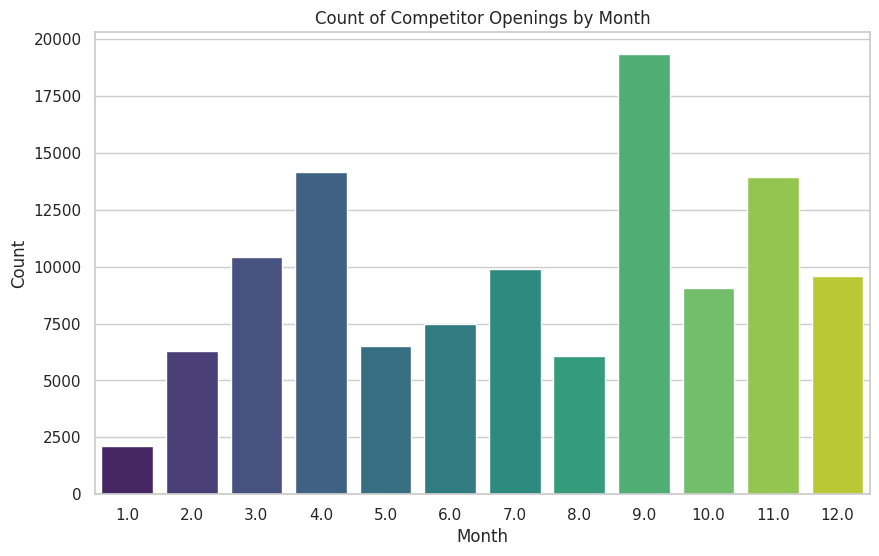

In [74]:
# plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of competitor openings by month
plt.figure(figsize=(10, 6))
sns.countplot(x='CompetitionOpenSinceMonth', data=dataset, palette='viridis')
plt.title('Count of Competitor Openings by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# - CompetitionOpenSinceYear Column:

The CompetitionOpenSinceYear column in the dataset indicates the year when the nearest competitor store opened.

In [75]:
max_year = dataset['CompetitionOpenSinceYear'].max()
min_year = dataset['CompetitionOpenSinceYear'].min()
print("Observation: ")
print("---")
print(f'Most Earliest Year: {min_year}')
print(f"Most Recent Year: {max_year}")
print(f"So, the range of years is between {min_year} and {max_year}.")

Observation: 
---
Most Earliest Year: 1900.0
Most Recent Year: 2015.0
So, the range of years is between 1900.0 and 2015.0.


Text(0, 0.5, 'Frequency')

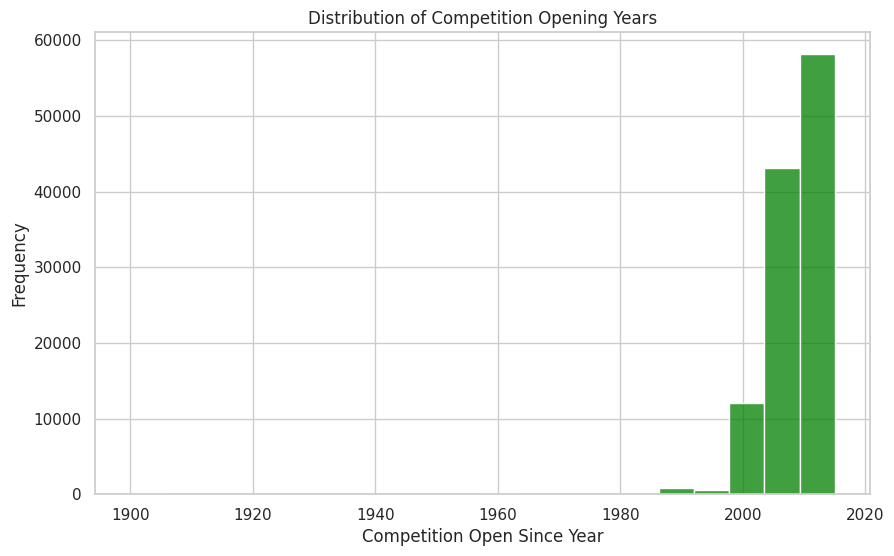

In [76]:
# Plot
sns.set(style="whitegrid")

# Create a histogram to show the distribution of competitor opening years
plt.figure(figsize=(10, 6))
sns.histplot(dataset['CompetitionOpenSinceYear'].dropna(), bins=20, color='green')
plt.title('Distribution of Competition Opening Years')
plt.xlabel('Competition Open Since Year')
plt.ylabel('Frequency')

# - Promo2 Column:

The Promo2 column in the dataset is a binary indicator that signifies whether a store is participating in a continuous and extended promotion.

In [77]:
dataset['Promo2'].value_counts()

Promo2
0    84799
1    83808
Name: count, dtype: int64

Text(0, 0.5, 'Count')

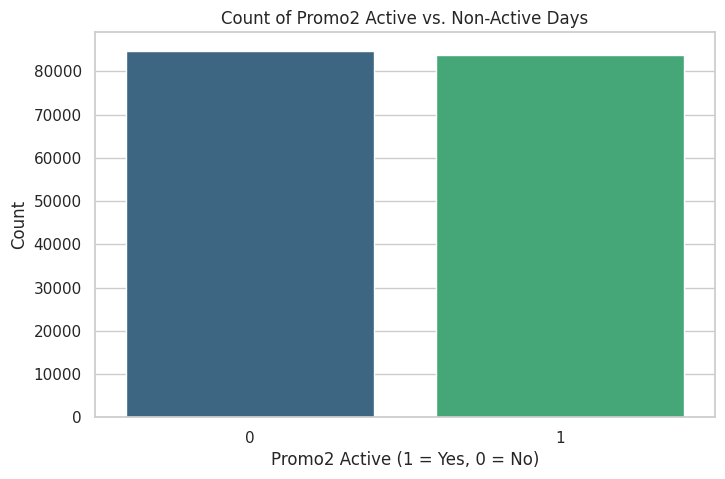

In [78]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of Promo2 active vs. non-active days
plt.figure(figsize=(8, 5))
sns.countplot(x='Promo2', data=dataset, palette='viridis')
plt.title('Count of Promo2 Active vs. Non-Active Days')
plt.xlabel('Promo2 Active (1 = Yes, 0 = No)')
plt.ylabel('Count')

# - Promo2SinceWeek Column:

The Promo2SinceWeek column in the dataset indicates the calendar week when the store started participating in Promo2 (continuous and extended promotion).

In [79]:
max_week = dataset['Promo2SinceWeek'].max()
min_week = dataset['Promo2SinceWeek'].min()
print("Observation: ")
print("---")
print(f'Most Earliest Week: {min_week}')
print(f"Most Recent Week: {max_week}")
print(f"So, the range of weeks is between {min_week} and {max_week}.")

Observation: 
---
Most Earliest Week: 1.0
Most Recent Week: 50.0
So, the range of weeks is between 1.0 and 50.0.


Text(0, 0.5, 'Frequency')

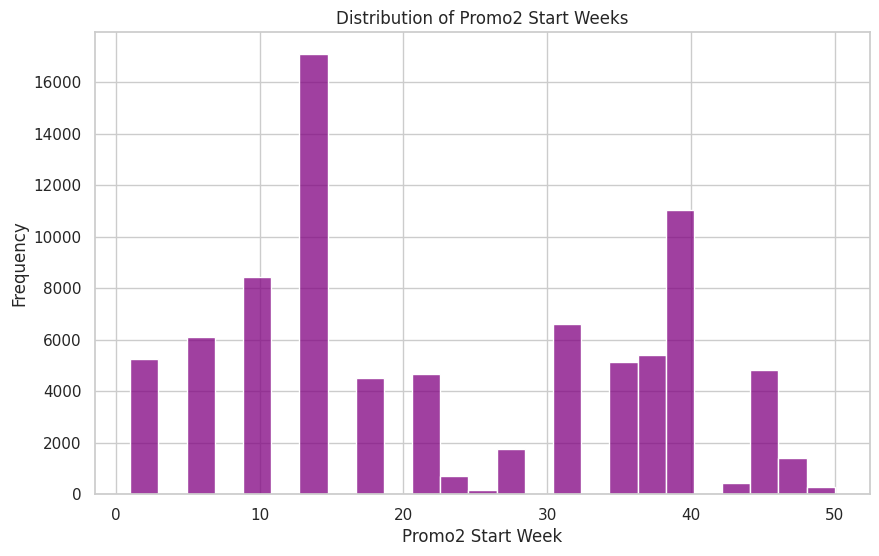

In [80]:
# Plot
sns.set(style="whitegrid")

# Create a histogram to show the distribution of Promo2 start weeks
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Promo2SinceWeek'].dropna(), bins=25, color='purple')
plt.title('Distribution of Promo2 Start Weeks')
plt.xlabel('Promo2 Start Week')
plt.ylabel('Frequency')

# - Promo2SinceYear Column:

The Promo2SinceYear column in the dataset indicates the year when the store started participating in Promo2 (continuous and extended promotion).

In [81]:
max_year = dataset['Promo2SinceYear'].max()
min_year = dataset['Promo2SinceYear'].min()
print("Observation: ")
print("---")
print(f'Most Earliest Year: {min_year}')
print(f"Most Recent Year: {max_year}")
print(f"So, the range of years is between {min_year} and {max_year}.")

Observation: 
---
Most Earliest Year: 2009.0
Most Recent Year: 2015.0
So, the range of years is between 2009.0 and 2015.0.


Text(0, 0.5, 'Frequency')

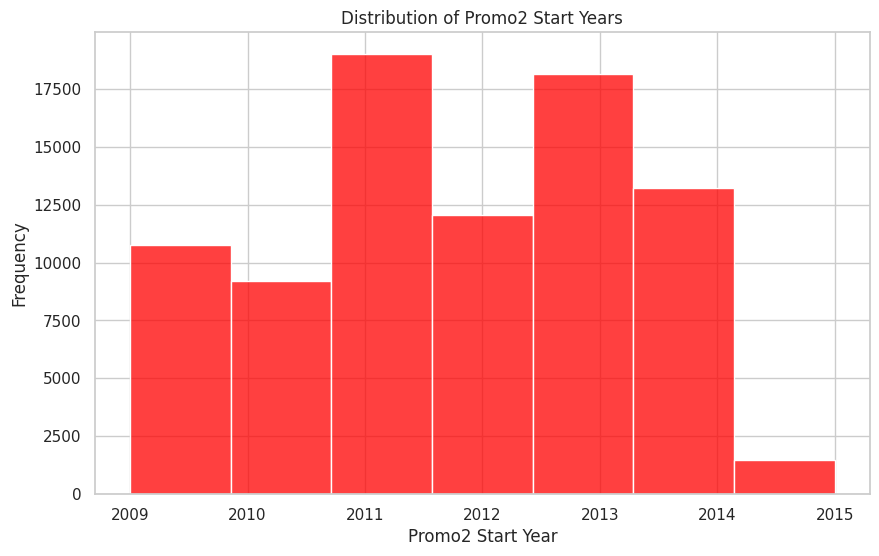

In [82]:
# Plot
sns.set(style="whitegrid")

# Create a histogram to show the distribution of Promo2 start years
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Promo2SinceYear'].dropna(), bins=7, color='red')
plt.title('Distribution of Promo2 Start Years')
plt.xlabel('Promo2 Start Year')
plt.ylabel('Frequency')

# - PromoInterval Column


The PromoInterval column in the dataset indicates the months during which the stores participate in continuous and extended promotions.

In [83]:
dataset['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     48458
Feb,May,Aug,Nov     19601
Mar,Jun,Sept,Dec    15749
Name: count, dtype: int64

Text(0, 0.5, 'Count')

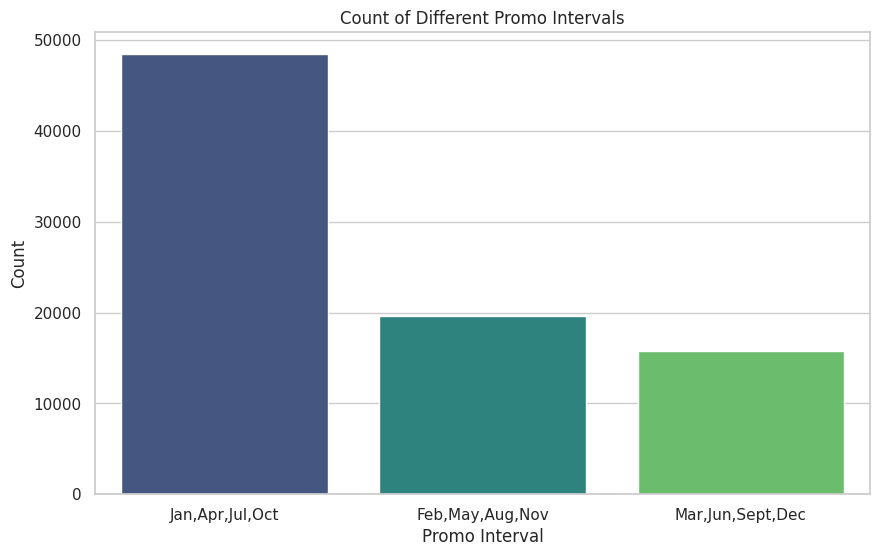

In [84]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the count of different promo intervals
plt.figure(figsize=(10, 6))
sns.countplot(x='PromoInterval', data=dataset, palette='viridis')
plt.title('Count of Different Promo Intervals')
plt.xlabel('Promo Interval')
plt.ylabel('Count')

# - Month Column

The Month column in the dataset indicates the month of the year when the sales data was recorded.

In [85]:
dataset['month'].value_counts()

month
1     17250
7     17190
3     17055
6     16527
4     16261
2     15974
5     15927
8     10752
9     10607
10    10595
11    10309
12    10160
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

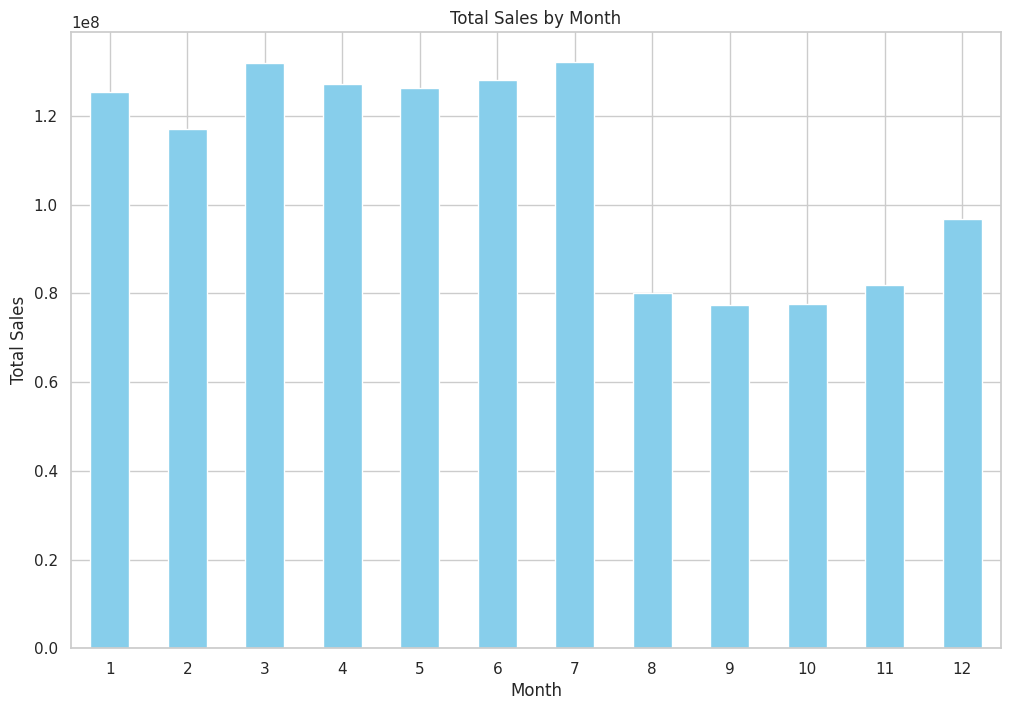

In [86]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the total sales by month
plt.figure(figsize=(12, 8))
sales_by_month = dataset.groupby('month')['Sales'].sum()
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# - Year Column

The Year column in the dataset indicates the year when the sales data was recorded.

In [87]:
dataset['year'].value_counts()

year
13    67626
14    61894
15    39087
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '13'), Text(1, 0, '14'), Text(2, 0, '15')])

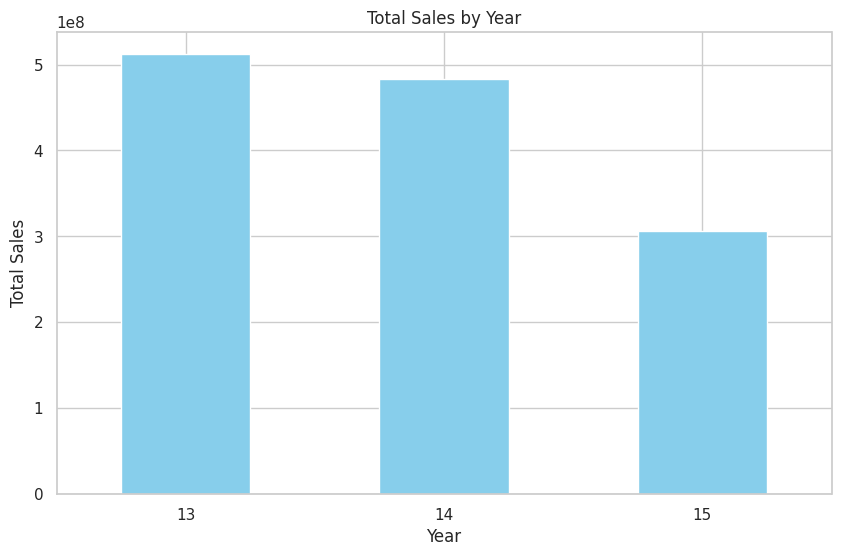

In [88]:
# Plot
sns.set(style="whitegrid")

# Create a bar plot to show the total sales by year
plt.figure(figsize=(10, 6))
sales_by_year = dataset.groupby('year')['Sales'].sum()
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# 2. `Data Cleaning and Preprocessing`

- Dealing with missing values

In [102]:
dataset.dropna(subset=['CompetitionDistance'], inplace=True)

# Calculate the proportion of each month in the non-missing data
value_counts = dataset['CompetitionOpenSinceMonth'].value_counts(normalize=True)

# Calculate the number of missing values
num_missing = dataset['CompetitionOpenSinceMonth'].isna().sum()

# Calculate the number of missing values to assign to each category
missing_values_to_fill = (value_counts * num_missing).round().astype(int)

while missing_values_to_fill.sum() != num_missing:
    difference = num_missing - missing_values_to_fill.sum()
    for index in missing_values_to_fill.index:
        if difference == 0:
            break
        if difference > 0:
            missing_values_to_fill[index] += 1
            difference -= 1
        else:
            if missing_values_to_fill[index] > 0:
                missing_values_to_fill[index] -= 1
                difference += 1

# Create a list of values to fill based on the calculated proportions
fill_values = []
for index, count in missing_values_to_fill.items():
    fill_values.extend([index] * count)

# Shuffle the fill values to ensure randomness
np.random.shuffle(fill_values)

# Assign the fill values to the missing data
dataset.loc[dataset['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = fill_values

# Impute missing values with mode for PromoInterval
dataset['PromoInterval'].fillna(dataset['PromoInterval'].mode()[0], inplace=True)

# Impute missing values with median for Promo2SinceWeek and Promo2SinceYear
dataset['Promo2SinceWeek'].fillna(dataset['Promo2SinceWeek'].median(), inplace=True)


dataset['Promo2SinceYear'].fillna(dataset['Promo2SinceYear'].median(), inplace=True)

dataset['CompetitionOpenSinceYear'].fillna(dataset['CompetitionOpenSinceYear'].median(), inplace=True)

# Verify the result
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 168179 entries, 0 to 168606
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      168179 non-null  int64  
 1   Customers                  168179 non-null  int64  
 2   Open                       168179 non-null  int64  
 3   Promo                      168179 non-null  int64  
 4   StateHoliday               168179 non-null  object 
 5   SchoolHoliday              168179 non-null  int64  
 6   StoreType                  168179 non-null  object 
 7   Assortment                 168179 non-null  object 
 8   CompetitionDistance        168179 non-null  float64
 9   CompetitionOpenSinceMonth  168179 non-null  float64
 10  CompetitionOpenSinceYear   168179 non-null  float64
 11  Promo2                     168179 non-null  int64  
 12  Promo2SinceWeek            168179 non-null  float64
 13  Promo2SinceYear            168179 

- Converting Data Types

In [104]:
# Convert specific columns to int
int_columns = [
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2SinceWeek', 'Promo2SinceYear'
]

# Convert columns to int
dataset[int_columns] = dataset[int_columns].astype('int')

# List of columns to convert to category
category_columns = [
    'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
    'StoreType', 'Assortment', 'CompetitionOpenSinceMonth',
    'Promo2', 'PromoInterval', 'month'
]

# Convert columns to category
dataset[category_columns] = dataset[category_columns].astype('category')

# Convert the 'year' column to string
dataset['year'] = dataset['year'].astype(str)

# Append '20' to the start of each value
dataset['year'] = dataset['year'].apply(lambda x: '20' + x.zfill(2))

# Convert the 'year' column back to int
dataset['year'] = dataset['year'].astype('int')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 168179 entries, 0 to 168606
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Sales                      168179 non-null  int64   
 1   Customers                  168179 non-null  int64   
 2   Open                       168179 non-null  category
 3   Promo                      168179 non-null  category
 4   StateHoliday               168179 non-null  category
 5   SchoolHoliday              168179 non-null  category
 6   StoreType                  168179 non-null  category
 7   Assortment                 168179 non-null  category
 8   CompetitionDistance        168179 non-null  float64 
 9   CompetitionOpenSinceMonth  168179 non-null  category
 10  CompetitionOpenSinceYear   168179 non-null  int64   
 11  Promo2                     168179 non-null  category
 12  Promo2SinceWeek            168179 non-null  int64   
 13  Promo2SinceYear    

- Preprocessing the dataset

In [120]:
# Identify numerical and categorical columns
numerical_columns = ['Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'year']
categorical_columns = ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'Promo2', 'PromoInterval', 'month']

# Separate the target variable and features
X = dataset.drop('Sales', axis=1)
y = dataset['Sales']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit and transform the training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Verify the result
print(X_train.shape)
print(X_test.shape)

(126134, 51)
(42045, 51)


# Training the models

### 1. Linear Regression

In [123]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [124]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 1273.7807477327535
Mean Absolute Error (MAE): 923.6936221607801


### 2. Random Forest Regression

In [126]:
# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 650.9812293872976
Mean Absolute Error (MAE): 442.3189749736977


3. XGBoost

In [129]:
# Train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 1062.5375342272644
Mean Absolute Error (MAE): 779.4775756631084


# Final Summary

In this notebook, I have successfully navigated through several critical stages of a data science project using the Kaggle Sales Prediction dataset. My journey included:

`Data Exploration and Preprocessing:`

I have effectively explored and understood the dataset, the preprocessing steps, including handling missing values and outliers, were methodically approached, ensuring the data quality for model training.

`Model Training and Evaluation:`

I trained three different models: Linear Regression, Random Forest Regression, and Gradient Boosting Machine (GBM).
Each model's performance was evaluated using metrics like RMSE and MAE.

`Results:`

Random Forest Regression showed better performance as compared to the Linear Regression and Gradient Boosting Machine models, though all models need further tuning for improved accuracy.